# Graph Partitioning via Qatalyst

### Introduction

One area of study from graph theory is the graph partitioning problem. Graph partitioning is used in a range of applications. In this demo, we aim to execute and plot the optimal split of two small graph instances achieved via Qatalyst graph partioining solver, using Dirac-1.

### Objective

##### Partition a graph into $\textit{k}$ disjoint collections of nodes, while minimizing the number of inter-partition edges.

### Qatalyst

#### I. Imports

Required and complementary imports:

In [1]:
from qci_client import QciClient
import helpers
import numpy as np
import networkx as nx
import sys, os

import matplotlib.pyplot as plt
%matplotlib inline

#### II. Problem formulation

Example problem 1 - an undirected barbell graph instance (formulated via NetworkX):
- 8 nodes per cluster
- 2 nodes connected by edges between the clusters

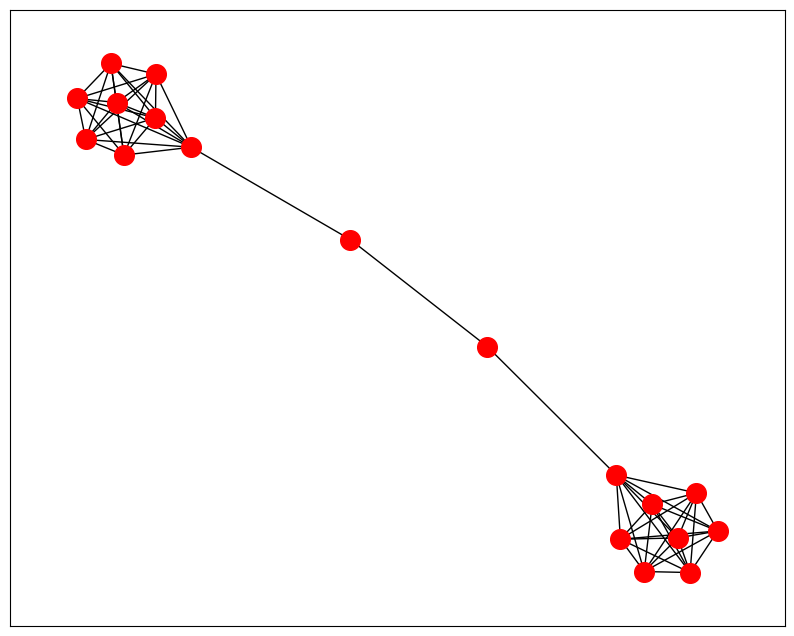

In [2]:
barbell_graph = nx.barbell_graph(8, 2)
helpers.plot_graph_plain(barbell_graph)

#### III. Client request parameters
- `alpha`, `beta`: hyperparameters for weighted importance of objective (`alpha`) versus constraint (`beta`)
- `n_samples`: number of samples (size of distribution to collect)
- `num_partitions`: number of partitions
- `sampler_type`: `"eqc1"` or `"csample"`
- `job_type`: `"graph-partitioning"`

In [3]:
# Constraint-objective hyperparameters
alpha = 1
beta = 1
# Num samples
n_samples = 1
# Number of partitions
num_partitions = 2

# Job and sampler type
sampler_type = "eqc1"

job_type = "graph-partitioning"

#### IV. Instantiate client, pass job parameters and execute

- Requirement: `QciClient` client token
- Preliminary: Use `upload_file()` of `QciClient` class instance to upload problem and retrieve `file_id` 
- Next: Pass `file_id`, alongside with the above parameters, to request body call, `build_job_body()` of `QciClient` class
- Last: Execute job with `process_job()` of `QciClient` class instance

In [4]:
url = "https://api.qci-next.com"
q1 = QciClient(api_token=os.getenv("QCI_TOKEN"), url=url)

In [5]:
file_id = q1.upload_file(barbell_graph, file_type="graph")["file_id"]
job_body = q1.build_job_body(job_type=job_type, graph_file_id=file_id, 
                             job_tags=["partition", "example", "!"], 
                             job_params={"sampler_type": sampler_type,
                                         "n_samples": n_samples, 
                                         "alpha": alpha,
                                         "beta": beta,
                                         "num_partitions": num_partitions})

res = q1.process_job(job_type=job_type, job_body=job_body, wait=True)

{'file_type': 'graph', 'file_name': 'graph.json', 'directed': False, 'multigraph': False, 'graph': {}, 'links': [{'source': 0, 'target': 1}, {'source': 0, 'target': 2}, {'source': 0, 'target': 3}, {'source': 0, 'target': 4}, {'source': 0, 'target': 5}, {'source': 0, 'target': 6}, {'source': 0, 'target': 7}, {'source': 1, 'target': 2}, {'source': 1, 'target': 3}, {'source': 1, 'target': 4}, {'source': 1, 'target': 5}, {'source': 1, 'target': 6}, {'source': 1, 'target': 7}, {'source': 2, 'target': 3}, {'source': 2, 'target': 4}, {'source': 2, 'target': 5}, {'source': 2, 'target': 6}, {'source': 2, 'target': 7}, {'source': 3, 'target': 4}, {'source': 3, 'target': 5}, {'source': 3, 'target': 6}, {'source': 3, 'target': 7}, {'source': 4, 'target': 5}, {'source': 4, 'target': 6}, {'source': 4, 'target': 7}, {'source': 5, 'target': 6}, {'source': 5, 'target': 7}, {'source': 6, 'target': 7}, {'source': 7, 'target': 8}, {'source': 8, 'target': 9}, {'source': 9, 'target': 10}, {'source': 10, 'ta

#### V. Evaluate solution

In this example, we use our imported `helpers` package to map and plot our solution. The returned solution is a list of dicts, as shown below, where: 
- `'class'`: partition index 
- `'id'`: node index:

In [6]:
res['results']['samples'][0][:5]

[{'class': 0, 'id': 0},
 {'class': 0, 'id': 1},
 {'class': 0, 'id': 2},
 {'class': 0, 'id': 3},
 {'class': 0, 'id': 4}]

`helpers` utilizes its `plot_graph_classes()` method to loop through the array of `dict` elements, place each `'id'` in one of k solution arrays, where k is the number of partitions, and then plot the array set using `networkx.draw_networkx_nodes()` (with a designated color set):

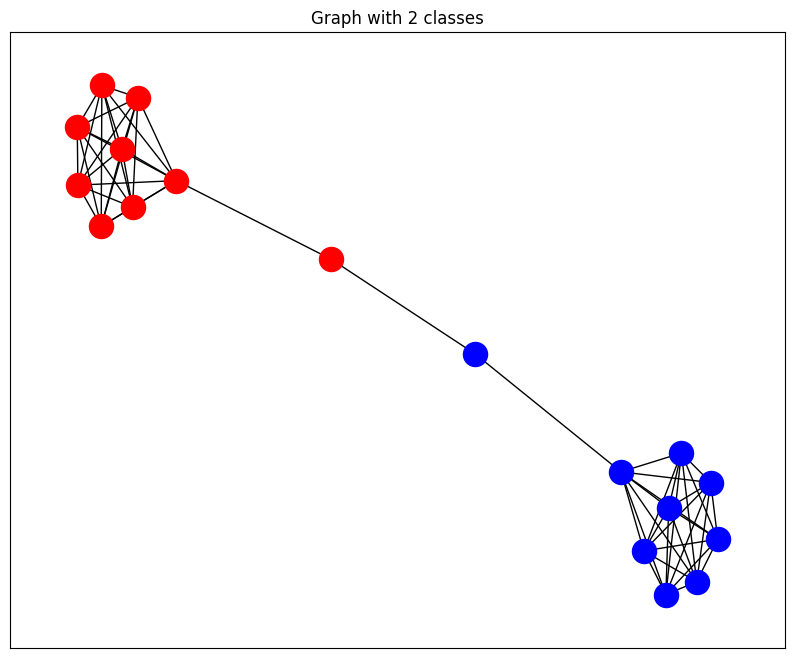

In [7]:
helpers.plot_graph_classes(barbell_graph, res['results']['samples'][0], num_classes=2)

### Rinse and Repeat

#### VI. Different graph instance: A random graph instance
Example problem 2:
- Random graph with low density
- We'll use the same job parameters used in the barbell graph instance.

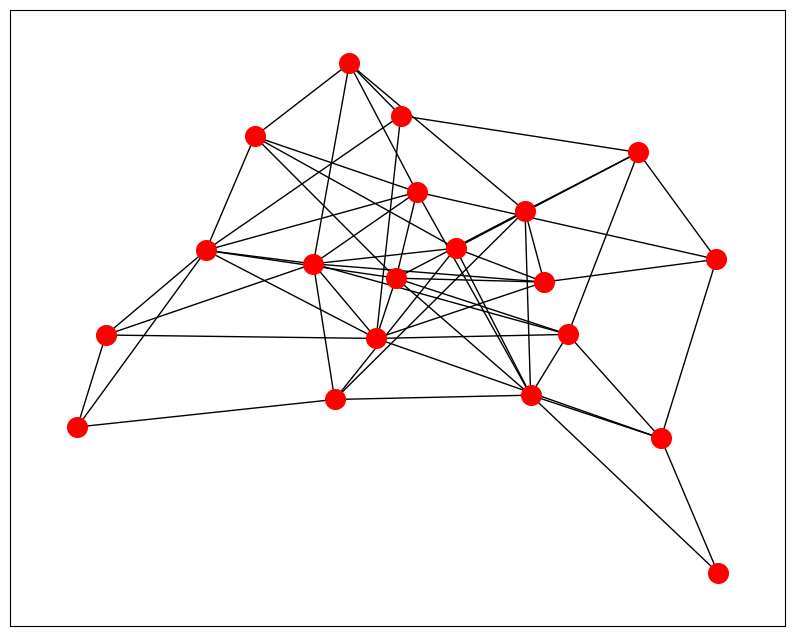

In [8]:
random_graph = nx.erdos_renyi_graph(20, 0.3)
helpers.plot_graph_plain(random_graph)

#### VII. Execute

In [9]:
# Upload, build, process
file_id = q1.upload_file(random_graph, file_type="graph")["file_id"]
job_body = q1.build_job_body(job_type=job_type, graph_file_id=file_id, 
                             job_tags=["example2", "partition", "!"], 
                             job_params={"sampler_type": sampler_type,
                                         "n_samples": n_samples, 
                                         "alpha": alpha,
                                         "beta": beta,
                                         "num_partitions": num_partitions})

res = q1.process_job(job_type=job_type, job_body=job_body, wait=True)

{'file_type': 'graph', 'file_name': 'graph.json', 'directed': False, 'multigraph': False, 'graph': {}, 'links': [{'source': 0, 'target': 2}, {'source': 0, 'target': 4}, {'source': 0, 'target': 5}, {'source': 0, 'target': 6}, {'source': 0, 'target': 7}, {'source': 0, 'target': 9}, {'source': 0, 'target': 10}, {'source': 0, 'target': 15}, {'source': 1, 'target': 5}, {'source': 1, 'target': 6}, {'source': 1, 'target': 8}, {'source': 1, 'target': 13}, {'source': 1, 'target': 16}, {'source': 1, 'target': 17}, {'source': 2, 'target': 5}, {'source': 2, 'target': 7}, {'source': 2, 'target': 8}, {'source': 2, 'target': 9}, {'source': 2, 'target': 15}, {'source': 2, 'target': 18}, {'source': 2, 'target': 19}, {'source': 3, 'target': 6}, {'source': 3, 'target': 9}, {'source': 3, 'target': 11}, {'source': 3, 'target': 13}, {'source': 3, 'target': 16}, {'source': 3, 'target': 17}, {'source': 4, 'target': 10}, {'source': 4, 'target': 12}, {'source': 4, 'target': 13}, {'source': 4, 'target': 14}, {'s

#### VIII. Evaluate solution

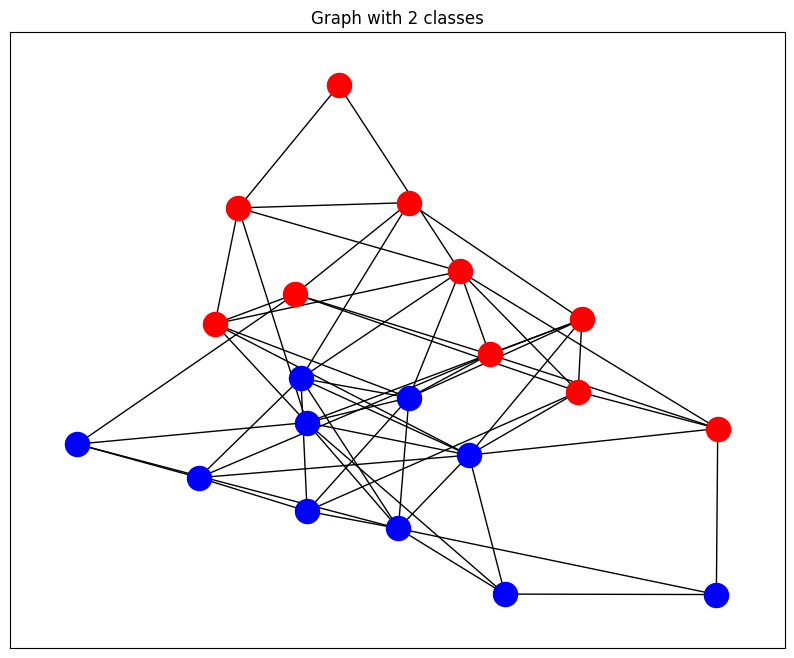

In [10]:
helpers.plot_graph_classes(random_graph, res['results']['samples'][0], num_classes=2)

#### Summary

We've shown the use of Qatalyst's `QciClient` class for instantiating and send a job request for executing graph partitioning on two graph instances. User graph instances are expected to be problem specific, and the `"graph-partitioning"` job type of the job body should be specified to implement graph partitioning optimization for the input graph instance passed to `upload_file()` (of the `QciClient` class instance). Last, we showed that the returned solutions are amenable to the NetworkX `draw_networkx_graph()` method, which was executed via the imported `helpers` package, for plotting the graph solution of the input problem instance.